In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
import povertymapping.ookla_data_proc as ookla

In [4]:
import sys

In [5]:
ookla_config = dict(
        save_path="../test_data/real_outputs/ookla_mm",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="mm",
        country="mm",
        ookla_folder="ookla_mm",
        hdx_folder="hdx_mm",
        dhs_folder="dhs_mm",
        dhs_geo_zip_folder="MMGE71FL",
        dhs_zip_folder="MMHR71DT",
        crs="4683",
        ookla_feature="avg_d_mbps",
        boundary_file="geoBoundaries-MMR-ADM3-all",
        year="2019",
        quarter="2",
        sample=False,
        random_sample=False,
        no_samples=60,
        random_seed=42,
        clust_rad=2000,
        plot_ookla_features=True,
        adm_level=3,
        use_pcode=False,
        shape_label='shapeID',
        bins=6,
        show_legend=False,
    )

# you can also create a yaml file or json file
# and load it in.

In [6]:
from pathlib import Path

In [7]:
# uncomment and run the following to clear out the preprocessed files 
!rm -rf {ookla_config['save_path']}
!mkdir -p {ookla_config['save_path']}

In [8]:
cluster_coords_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_geo_zip_folder']}_cluster_coords.csv"

In [9]:
!cp {cluster_coords_path} {ookla_config['save_path']}/.

In [10]:
%%time
ookla.process_ookla_data(ookla_config)

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 441/441 [00:08<00:00, 51.78it/s]
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/povertymapping/utils/data_utils.py:449: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  geometry_and_cluster_features.groupby(group_indices).mean().reset_index()
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 9.61 s, sys: 1.31 s, total: 10.9 s
Wall time: 10.1 s


<Figure size 1200x1000 with 0 Axes>

Check that the preprocessed files have been created

In [11]:
ookla_df_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}.csv"

In [12]:
ookla_df = pd.read_csv(ookla_df_path)

In [13]:
len(ookla_df)

127

In [14]:
ookla_df.head()

,Unnamed: 0,DHSID,avg_d_mbps
0,0,MM201500000002,11.749714
1,1,MM201500000005,13.948526
2,2,MM201500000008,1.999000
3,3,MM201500000014,4.806125
4,4,MM201500000017,8.436481


In [15]:
use_pcode = ookla_config["use_pcode"]
adm_level = ookla_config["adm_level"]
if use_pcode:
    aggregate = f"pcode_adm{adm_level}"       
else:
    aggregate = ookla_config["shape_label"]


In [16]:
ookla_by_adm_gdf_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}_by_{aggregate.lower()}.geojson"

In [17]:
ookla_by_adm_gdf = gpd.read_file(ookla_by_adm_gdf_path)

In [18]:
len(ookla_by_adm_gdf)

330

In [19]:
ookla_by_adm_gdf.head()

,shapeID,DHSYEAR,DHSCLUST,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,DHSREGCO,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,avg_d_mbps,index_right,geometry
0,MMR-ADM3-12887294B82936993,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((96.39906 17.05051, 96.39499 17.04863..."
1,MMR-ADM3-12887294B61768393,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((93.37924 14.06623, 93.37396 14..."
2,MMR-ADM3-12887294B67480517,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((94.94570 16.74394, 94.95272 16.74625..."
3,MMR-ADM3-12887294B71204784,2015.0,362.000000,None,None,None,None,14.0,14.0,16.387802,95.261907,13.000000,10.0,3.40200,3.0,"MULTIPOLYGON (((95.08503 16.09785, 95.07862 16..."
4,MMR-ADM3-12887294B5652310,2015.0,238.333333,None,None,None,None,12.0,12.0,16.780064,96.145902,17.333333,6.0,11.28651,4.0,"POLYGON ((96.14631 16.77437, 96.15193 16.77391..."


In [20]:
len(ookla_by_adm_gdf)

330

In [21]:
ookla_by_adm_gdf.avg_d_mbps.isna().sum()

209

In [22]:
if use_pcode:
    group_indices = [f"ADM{adm_level}_PCODE", f"ADM{adm_level}_EN"]
else:
    group_indices = [ookla_config["shape_label"]]


In [23]:
with_data = ookla_by_adm_gdf[ookla_by_adm_gdf.avg_d_mbps.notna()][[*group_indices,'DHSCLUST',ookla_config['ookla_feature'],'geometry']] 
with_data.head()

,shapeID,DHSCLUST,avg_d_mbps,geometry
3,MMR-ADM3-12887294B71204784,362.000000,3.402000,"MULTIPOLYGON (((95.08503 16.09785, 95.07862 16..."
4,MMR-ADM3-12887294B5652310,238.333333,11.286510,"POLYGON ((96.14631 16.77437, 96.15193 16.77391..."
5,MMR-ADM3-12887294B39727343,316.500000,11.142463,"POLYGON ((96.17533 16.78537, 96.17648 16.78112..."
6,MMR-ADM3-12887294B37293255,176.000000,11.772832,"POLYGON ((96.10529 16.78523, 96.11265 16.78405..."
7,MMR-ADM3-12887294B23042787,117.500000,10.937128,"POLYGON ((96.17285 16.83575, 96.17646 16.82679..."


In [24]:
len(with_data)

121

In [25]:
orig_ookla_gdf_path = Path(ookla_config['repo_path'])/ookla_config['data_dir']/ookla_config['ookla_folder']/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_ookla.geojson"

In [26]:
orig_ookla_gdf = gpd.read_file(orig_ookla_gdf_path)

In [27]:
orig_ookla_gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,shapeName,Level,shapeID,shapeGroup,shapeType,geometry
0,1322012223122322,6732,6639,19,626,144,190,Tamwe,ADM3,MMR-ADM3-12887294B190919,MMR,ADM3,"POLYGON ((96.17305 16.81196, 96.17855 16.81196..."
1,1322012223122212,6445,5355,18,224,57,190,Tamwe,ADM3,MMR-ADM3-12887294B190919,MMR,ADM3,"POLYGON ((96.16207 16.82248, 96.16756 16.82248..."
2,1322012223122300,10146,9366,16,169,48,190,Tamwe,ADM3,MMR-ADM3-12887294B190919,MMR,ADM3,"POLYGON ((96.17305 16.82773, 96.17855 16.82773..."
3,1322012223122302,15425,10668,20,201,57,190,Tamwe,ADM3,MMR-ADM3-12887294B190919,MMR,ADM3,"POLYGON ((96.17305 16.82248, 96.17855 16.82248..."
4,1322012223300010,59614,60585,5,48,27,190,Tamwe,ADM3,MMR-ADM3-12887294B190919,MMR,ADM3,"POLYGON ((96.16207 16.80670, 96.16756 16.80670..."


In [28]:
orig_ookla_gdf["avg_d_mbps"] = orig_ookla_gdf["avg_d_kbps"]/1000
orig_ookla_gdf["avg_u_mbps"] = orig_ookla_gdf["avg_u_kbps"]/1000

In [29]:
import matplotlib.pyplot as plt

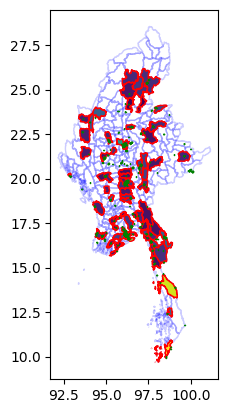

In [30]:
ax = plt.axes()
ax = ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='blue', alpha=0.2)
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='green', ax=ax)

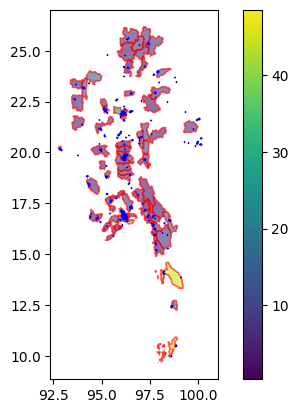

In [31]:
ax = plt.axes()
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax, legend=True, alpha=0.6)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='blue', ax=ax)

In [32]:
img_path = (Path(ookla_config['save_path'])/f'{ookla_config["boundary_file"]}_{ookla_config["ookla_feature"]}.jpeg').as_posix(); img_path

'../test_data/real_outputs/ookla_mm/geoBoundaries-MMR-ADM3-all_avg_d_mbps.jpeg'

In [33]:
from PIL import Image

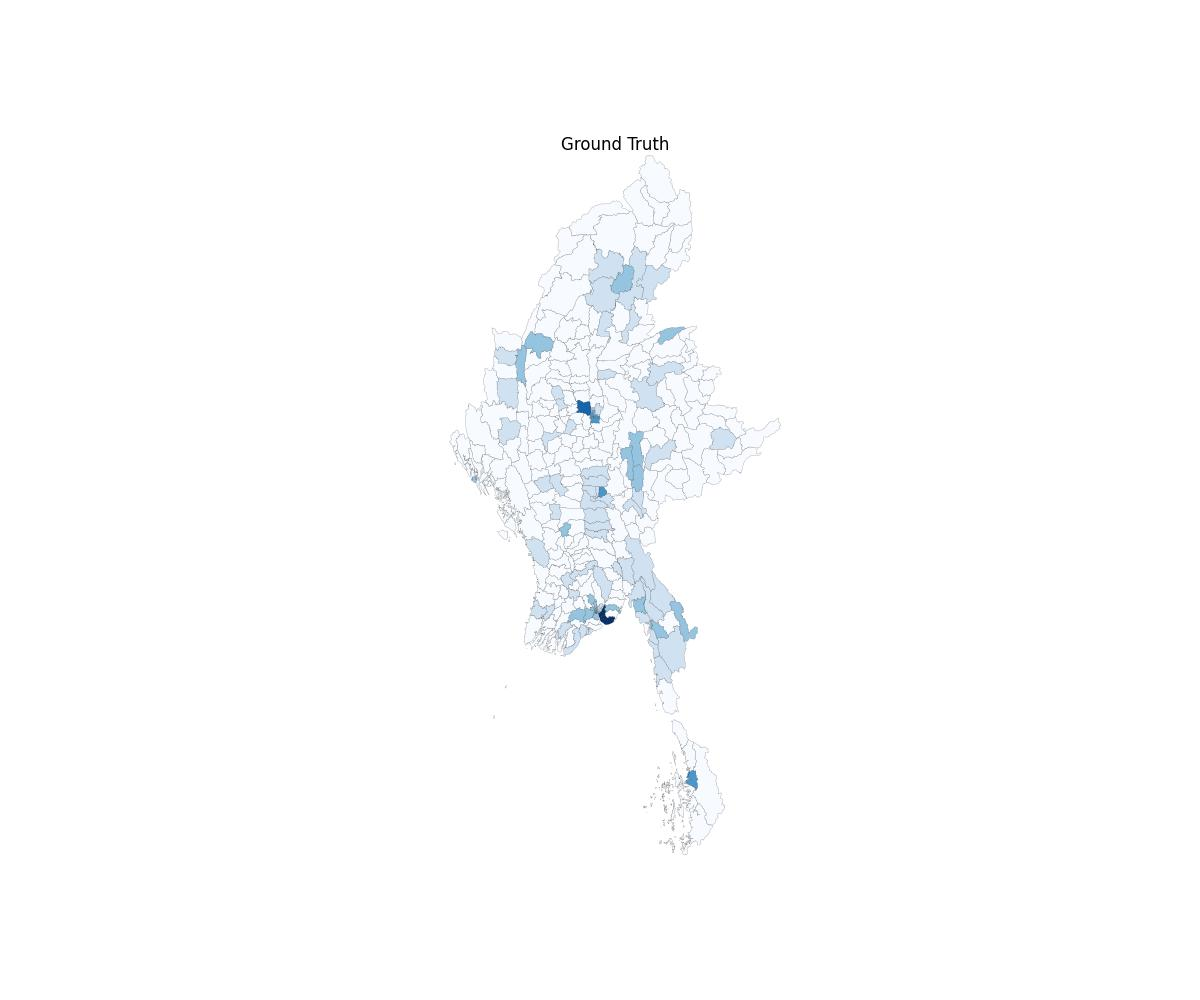

In [34]:
img = Image.open(img_path); img

In [35]:
dhs_by_cluster_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_zip_folder']}_{ookla_config['dhs_geo_zip_folder']}_by_cluster.geojson"

In [36]:
dhs_by_cluster = gpd.read_file(dhs_by_cluster_path)

In [37]:
len(dhs_by_cluster)

441

In [38]:
dhs_by_cluster.columns.values

array(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA',
       'LATNUM', 'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype=object)

In [39]:
dhs_data = dhs_by_cluster[["DHSCLUST","DHSID","Wealth Index","geometry","LATNUM","LONGNUM"]].copy()
dhs_data.head()

,DHSCLUST,DHSID,Wealth Index,geometry,LATNUM,LONGNUM
0,1,MM201500000001,-52232.000000,POINT (95.36008 20.05864),20.058637,95.360081
1,2,MM201500000002,130773.724138,POINT (96.04562 17.11240),17.112398,96.045616
2,3,MM201500000003,-4955.000000,POINT (97.36424 16.50766),16.507664,97.364236
3,4,MM201500000004,47824.103448,POINT (96.28388 26.68452),26.684519,96.283879
4,5,MM201500000005,9434.482759,POINT (96.05350 16.86606),16.866059,96.053499


In [40]:
dhs_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
from povertymapping.utils.data_utils import add_buffer_geom

In [42]:
add_buffer_geom(dhs_data, r=ookla_config['clust_rad'])

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 441/441 [00:09<00:00, 45.88it/s]


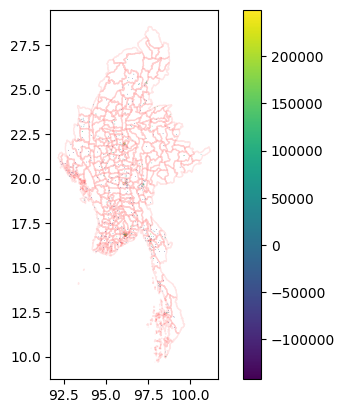

In [43]:
ax = plt.axes()
ax= ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='red', alpha=0.1)
ax = dhs_data.plot(column="Wealth Index", ax=ax, legend=True)